# Homework #1

**See Canvas for HW #1 assignment due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the class scanning policy. Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## A. Theoretical Problems

### Problem A.1


Suppose that $X_1,...,X_n \overset{iid}{\sim}N(\mu, \sigma^2)$, where $\sigma$ is known, and we are interested in an estimator for $\theta = \mu^2$. (Note that we will use the following calculuations to make comparisons to the parametric boostrap method explored below).

#### (a) Find the maximum likelihood estimator (MLE) for $\theta$, denoted $\widehat{\theta}$. 

This will be easy if you use one of the important properties of MLEs!

The Likelihood function for a Normal Distibution is $(2 \pi \sigma^{2})^{\frac{-n}{2}} \cdot \exp{(\frac{-1}{2 \sigma^{2}} \sum_{i=1}^{n}(x_{j} - \mu)^{2}})$ and the derivative of the natural log of the Likelihood function shows us that $\hat{\mu} = mean(\mu)$ because we can use the monotonic function $\sqrt{x}$ to relate $\mu$ and $\mu^{2}$ then we can say $\hat{\theta} = (mean(\mu))^{2}$

#### (b) Compute the bias of $\widehat{\theta}$, denoted $Bias(\widehat{\theta})$. Recall that $Bias(\widehat{\theta}) = E(\widehat{\theta}) - \theta$. 

for an estimate, $\theta = E(\hat{\theta})+Bias(\hat{\theta})$ so for $\mu$ this becomes $\mu = E(\hat{\mu})+Bias(\hat{\mu})$ and we know that for any normal distribution $Bias(\hat{\mu}) = 0$ so $(\mu)^{2} = (E(\hat{\mu})+0)^{2} = \hat{\theta} + 0 \cdot Bias(\hat{\theta}) + 0 -> Bias(\hat{\theta}) = 0$

#### (c) <span style="color: #CFB87C;">(STAT 5010 Only)</span> Compute the variance of $\widehat{\theta}$, denoted $Var(\widehat{\theta})$. (HINT: You might use a moment generating function at some point in your answer.)

#### (d) Write down the boostrap estimators of $Bias(\widehat{\theta})$ and $Var(\widehat{\theta})$.

For $Bias(\hat{\theta})$ we will use $\sum_{i=1}^{n}\frac{\hat{\theta_{i}}-mean(\hat{\theta})}{n} = Bias(\hat{\theta})$ and for $Var(\hat{\theta})$ we will use the standard deviation of the vector we get from computing $\hat{\theta}$ for each of the bootstrap samples

### Problem A.2 

#### Provide a brief explanation of the pros and cons of using the bootstrap for calculating confidence intervals.

The pro's of bootstraping are that for small samples from non-regular populations we can more acurately determine estimates for a population parameter and come up with the bootstrap pivot CI for these estimates. There are cons to both parametric and non-parametric bootstraping. For parametric bootstraping we are opperating under the assumption that the underlying population has the same distribution as our sample. If we make this assumption incorrectly everything we do from thereon out will be invalid. For non-parametric bootstraping we can run into issues if the sample gets to small because we may end up understating the probability of rare events and in both cases we assume an infinite population, but if our bootstrap sample is a non-trival percentage of a finite population the assumptions of bootstraping break down. (credit to Michael Chernick author of "Bootstrap Methods: A Practitioners Guide" https://stats.stackexchange.com/questions/280725/pros-and-cons-of-bootstrapping)

## B. Computational Problems

### Problem B.1

#### Suppose that $X_1,...,X_8 \overset{iid}{\sim} \Gamma(\alpha, \beta)$. Let's use the bootstrap to compute a $90\%$ confidence interval for the population standard deviation: $sd(X) = \sqrt{\alpha/\beta^2} = \theta$.



Note: 

The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" parameterization: shape = $\alpha$, rate = $\beta$. But R uses the "shape/scale" parameterization: shape = $\alpha$, scale = $\theta = 1/\beta$. 

To be sure that you are properly simulating from the right gamma distribution, see the help file for rgamma() (run: ?rgamma). Also, see [here](https://en.wikipedia.org/wiki/Gamma_distribution) for more information on the gamma distribution.


#### (a) State why a $\chi^2$ confidence interval is not valid in this context.
You should reply on knowledge from your prereq class!

This is not a normal distribution and we cannot use the chi squared distribution because we have small sample with an unknown variance

#### (b) Generate a sample of size $n = 8$ from $\Gamma(\alpha = 3, \beta = 4)$ and calculate the true population standard deviation (in this example, we are generating data so that we can see how well our estimation procedure will do).

In [26]:
set.seed(299)
n = 8; x = rgamma(n,shape = 3,rate = 4);
trueSD = sqrt(3/16);
cat(trueSD)

0.4330127

#### (c) Generate $B = 200$ bootstrap samples from the above sample. Print the dimension, and articulate what each row/column represents. Avoid loops! (HINT: use the replicate() function.)


In [27]:
B = 200
bs = replicate(B, sample(x,n,replace = TRUE)); dim(bs)

[1]   8 200

This means that the bootstrap matrix, bs has 8 rows, the same number as the original sample, x, with replacement, and 200 columns which is the number of bootstrap samples we have just taken

#### (d) Calculate and print the sample standard deviation, $s$. Then, calculate $s$ for each bootstrap sample. Denote this as $s^*_i$, for $i = 1,...,B$. Avoid loops! (HINT: use the apply() function.) Display a histogram of the distribution of  $s^*_i, \,\, i=1,...B$.

0.320464

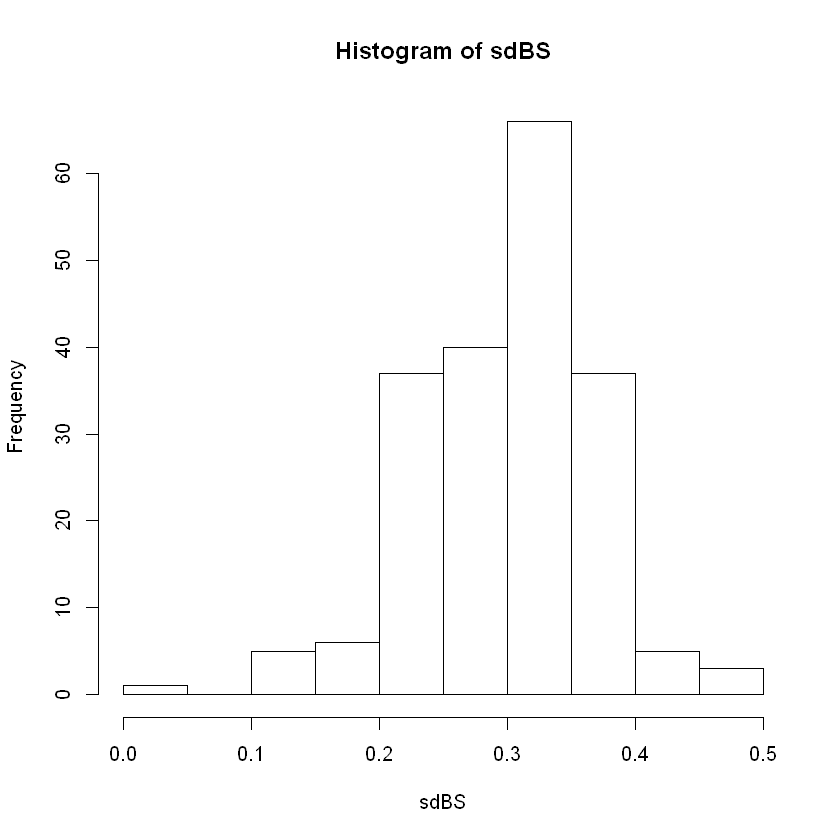

In [28]:
sdSample = sd(x);
sdBS = apply(bs,2,sd);
hist(sdBS);
cat(sdSample)

#### (e) Use the quantile() function to find the 5th and 95th percentile of the distribution of  $s^*_i$. Use these values to calculate the $90\%$ boostrap pivot confidence interval and bootstrap percentile confidence interval for $\theta$. 

In [29]:
quantile(sdBS,0.05);
quantile(sdBS,0.95);
cat("The 90% bootstrap pivot CI is (" ,2*sdSample - quantile(sdBS,0.95), ", " ,2*sdSample - quantile(sdBS,0.05), ")" )

5% 
0.1946655

95% 
0.3913002

The 90% bootstrap pivot CI is ( 0.2496278 ,  0.4462625 )

#### (f) Interpret this confidence interval.

This means we are 90% certian that this interval covers the true standard deviation 

### Problem B.2

Thus far, we've been looking at the *nonparametric bootstrap*. In this problem, we look at the *parametric bootstrap* as a way of estimating the bias and variance of an estimator $\widehat{\theta} = \bar{X}^2$ of $\theta = \mu^2$ (in problem A.1 you calculated these values exactly).

#### (a) Generate $X_1,...,X_{20} \overset{iid}{\sim}N(\mu = 2, \sigma^2 = 1)$, and then forget that you know $\mu$ and $\sigma^2$. Find the sample mean and sample variance. 

In [121]:
set.seed(232)
nTwo = 20; xTwo = rnorm(nTwo,2,1); xbarTwo = mean(xTwo); vTwo = var(xTwo); cat("Sample mean: " ,xbarTwo, "Sample variance: " ,vTwo)

Sample mean:  2.349677 Sample variance:  0.7211023

#### (b) Define $\widehat{N}$ to be the distribution of the variable $X_i$ in the population with the sample estimates plugged in for the unknown population parameters. Write down $\widehat{N}$ based on the data generated in (a). 

$\hat{N}$ is our underlying distrubtion which in this case is $N(\mu = 2, \sigma^{2} = 1)$

#### (c) Draw $B = 500$ parametric bootstrap samples from $\widehat{N}$, and for each bootstrap sample $(X_{1,j},...,X_{20,j})$, compute $$ \widehat{\theta}^*_j = \bigg(\frac{1}{20}\sum^{20}_{i=1}X^*_{i,j}\bigg)^2,$$ where $j = 1,...,B$.

In [124]:
set.seed(232)
BTwo = 500
bsTwo = replicate(BTwo, rnorm(nTwo,2,1)); dim(bsTwo)

[1]  20 500

#### (d) Compute an estimate of the bias of $\widehat{\theta}$.



In [135]:
thetaHatTwo = (colMeans(bsTwo))^2;
thetaHatTwoBias = thetaHatTwo - 4;
cat("The point estimator of the bias of ThetaHat is:" ,mean(thetaHatTwoBias), "\n");
lb = 2*mean(thetaHatTwoBias)-quantile(thetaHatTwoBias,0.95);
ub = 2*mean(thetaHatTwoBias)-quantile(thetaHatTwoBias,0.05);
cat("The 90% CI for the Bias of ThetaHat is (",lb, "," ,ub, ")")

The point estimator of the bias of ThetaHat is: 0.1279705 
The 90% CI for the Bias of ThetaHat is ( -1.440554 , 1.646163 )

#### (e) Compute an estimate of the variance of $\widehat{\theta}$.


In [153]:
cat("The point estimate of the varince of thetaHat is ",var(thetaHatTwo), "\n")
lbvar = var(thetaHatTwo) - qnorm(0.95) * sd(thetaHatTwo)
ubvar = var(thetaHatTwo) + qnorm(0.95) * sd(thetaHatTwo)
cat("The 90% CI for the Bias of ThetaHat is (",lbvar, "," ,ubvar, ")")

The point estimate of the varince of thetaHat is  0.8833453 
The 90% CI for the Bias of ThetaHat is ( -0.6625943 , 2.429285 )

#### (f) True or False: For a fixed sample size $n = 20$, as $B$ increases, $\widehat{Bias}(\widehat{\theta})$ will approach ${Bias}(\widehat{\theta})$.  That is, for a fixed $n$, the bootstrap estimate of the bias will approach the true bias as the number of bootstrap samples, $B$ increases. You might consider running a simulation to decide!

In [151]:
set.seed(2332);
BSim = 10000;
bsSim = replicate(BSim, rnorm(20,2,1));
thetaHatSim = (colMeans(bsSim))^2;
thetaHatSimBias = thetaHatSim - 4;
cat("The point estimator of the bias of ThetaHat is:" ,mean(thetaHatSimBias), "\n");
lb = 2*mean(thetaHatSimBias)-quantile(thetaHatSimBias,0.95);
ub = 2*mean(thetaHatSimBias)-quantile(thetaHatSimBias,0.05);
cat("The 90% CI for the Bias of ThetaHat is (",lb, "," ,ub, ")");

The point estimator of the bias of ThetaHat is: 0.0484221 
The 90% CI for the Bias of ThetaHat is ( -1.499405 , 1.427661 )

Instinctively the answer is true, because as we take more random samples from a normal distribution then we would expect for the estimate of the bias of $\mu$ to converge to 0 and from the theoretical section above we determined that the bias for $\hat{\theta}$ = 0. This is for a parametric case which means that we get to increase the number of iid samples from the population as B increases, but this is not the case for non-parametric bootstraping.

### Problem B.3

The "Wisconsin Card Sorting Test" is widely used by psychiatrists, neurologists, and neurophycologists with patients who have a brain injury. Patients with any sort of frontal lobe lesion generally do poorly on the test. The data frame WCST contains the test scores from a group of 50 patients from the *Virgen del Camino* Hospital.
#### (a) Using the code below, load the WCST data and explore whether there is reason to believe that the score data comes from a non-normal distribution. First, create a histogram (use ggplot!) and describe whether the data look normal. Then, use the function shapiro.test() to explore normality. Be sure to explain what this function does--i.e., what's the null and alternative hypothesis--in your answer.


	Shapiro-Wilk normality test

data:  scores
W = 0.77472, p-value = 2.405e-07


[1] 1

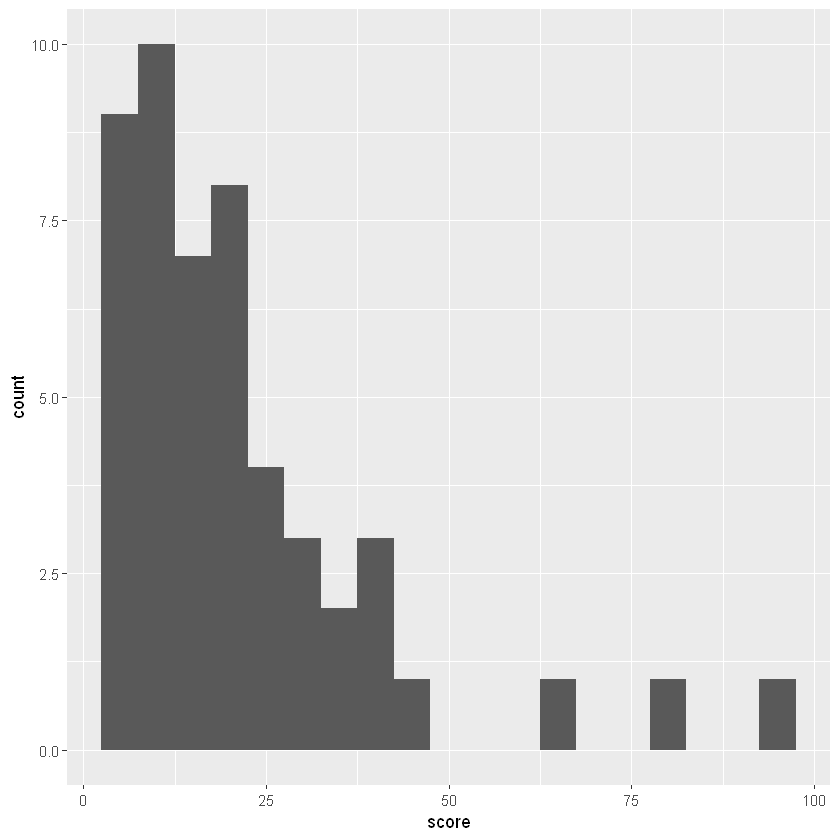

In [91]:
wcst = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/wcst.txt")
#or: install.packages("PASWR", dependencies = TRUE)
#library(PASWR); data(WCST)
#library(ggplot2);
#library(tidyverse)
ggplot(wcst, aes(x=score))+geom_histogram(binwidth = 5);
scores = wcst %>% pull(score)
shapiro.test(scores)
length(wcst)

This data does not appear normal. The Shapiro-Wilks test tell us that the p-value is less than our $\alpha$: 0.05 and so we will reject $H_{0}$: The data is normal.

#### (b) What assumptions must be made in order to compute a (non-boostrap) 95% confidence interval for the population mean score?

We can either make the assumption that the underlying population distribution is normal(it does not appear to be in this case) or we can invoke CLT by saying our sample has enough data points ie n>40, which is true for this data

#### (c) Compute the confidence interval from (b).

In [92]:
lb = mean(scores)-sd(scores)*1.96/sqrt(50);
ub = mean(scores)+sd(scores)*1.96/sqrt(50);
cat("The 95% CI for the population mean using CLT is (" ,lb, ", " ,ub, ")")

The 95% CI for the population mean using CLT is ( 16.37808 ,  26.58192 )

#### (d) Compute a 95% bootstrap pivot confidence interval for the mean. 

In [64]:
BThree = 500;
nThree = 50;
bsThree = replicate(BThree, sample(scores,nThree,replace = TRUE)); 

In [63]:
scoreMeans = colMeans(bsThree);
lb = 2*mean(scores)-quantile(scoreMeans,0.975);
ub = 2*mean(scores)-quantile(scoreMeans,0.025);
cat("The 95% Bootstrap pivot CI is: (" ,lb, "," ,ub, ")")

The 95% Bootstrap pivot CI is: ( 16.64 , 26.34 )

### Problem B.4
The dataset gives the number of births per month in New York city, from January 1946 to December 1959. The data are ordered.

#### (a) Load the data using the code below. Put the data into the form of an R dataframe (or tibble). Construct another column in the dataset that labels the month and year for each birth per month record.

In [156]:
births = read.table("https://robjhyndman.com/tsdldata/data/nybirths.dat", sep = "\t")


#### (b) Construct a plot of births per month against the month/year column that you created in part (a). Analyze the plot. Do you notice anything interesting?

In [157]:
as.data.frame(births);
month <- vector();
year <- vector();
for(i in 1:14){
    for(j in 1:12){
        month <- append(month,j)
        year <- append(year, i + 1945 + j/12)
    }    
}
births$year = year;
births$month = as.factor(month);

V1
26.663
23.598
26.931
24.740
25.806
24.364
24.477
23.901
23.175
23.227


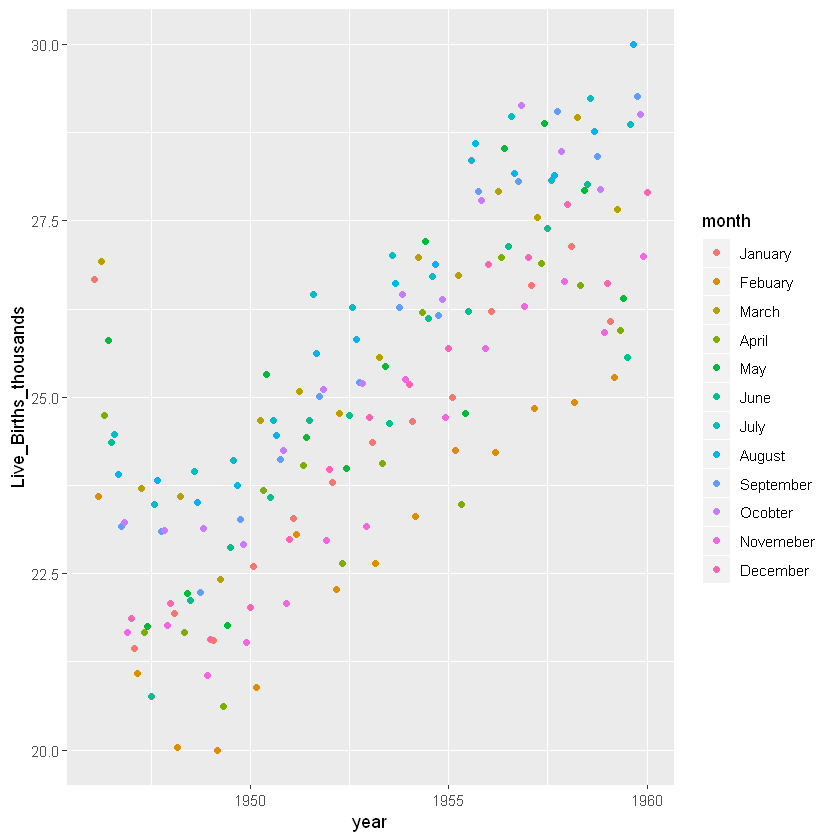

In [158]:
births = births%>% mutate(month=factor(month, labels = c("January", "Febuary","March","April","May","June","July","August","September","Ocobter","Novemeber","December")))
births = births %>% rename(Live_Births_thousands = V1);
ggplot(births, aes(x = year, y = Live_Births_thousands, color = month))+geom_point()

#### (c) Suppose that your boss asked you to use the bootstrap to construct a confidence interval for the average number of births per month in New York city over the time period in the dataset. Write a short response to your boss describing why this confidence interval is not valid for this data.

The main issue is that the sample is clearly not IID in regards to month vs number of live births, because there is covariance with the year. This is unsuprising, the population of NYC grew from 1946, to 1959 in particular this was the baby boom era so births in general went up. It might be possible to see if the percentage of births in a given year by month do not exhibit the same covariance with year. 